In [1]:
import pandas as pd

df = pd.read_csv("../results/generated_answers.csv")

df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../results/generated_answers.csv'

In [2]:
import os

print(os.getcwd())
print(os.listdir(".."))


C:\Users\hrida\llm-hallucination-project\notebook
['.ipynb_checkpoints', '01_load_dataset.ipynb', 'data', 'evaluation', 'notebook', 'results', 'retrieval', 'Untitled.ipynb', 'verification']


In [3]:
print(os.listdir("../results"))


[]


In [4]:
df = pd.read_csv("../results/final_scored.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../results/final_scored.csv'

In [4]:
df = pd.read_csv("../results/final_scored.csv")


FileNotFoundError: [Errno 2] No such file or directory: '../results/final_scored.csv'

In [5]:
import os

print("Current folder:", os.getcwd())


Current folder: C:\Users\hrida\llm-hallucination-project\notebook


In [6]:
os.listdir()


['.ipynb_checkpoints',
 '02_build_retriever.ipynb',
 '03_generate_answers.ipynb',
 '4_hallucination_scoring.ipynb']

In [7]:
os.listdir("..")


['.ipynb_checkpoints',
 '01_load_dataset.ipynb',
 'data',
 'evaluation',
 'notebook',
 'results',
 'retrieval',
 'Untitled.ipynb',
 'verification']

In [8]:
os.listdir("../results")


[]

In [9]:
df_small.to_csv("../results/generated_answers.csv", ...)


NameError: name 'df_small' is not defined

In [10]:
import pandas as pd

# reload main dataframe
df = pd.read_csv("../data/fever_small.csv")

# recreate df_small from first N answers
N = len(answers)

df_small = df.head(N).copy()
df_small["model_answer"] = answers

df_small.to_csv("../results/generated_answers.csv", index=False)

print("Saved generated_answers.csv to results ✅")


NameError: name 'answers' is not defined

In [11]:
import pandas as pd

df = pd.read_csv("../data/fever_small.csv")


In [12]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

embedder = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("../retrieval/fever.index")


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [13]:
def retrieve_docs(query, k=3):
    q_emb = embedder.encode([query])
    _, indices = index.search(np.array(q_emb), k)
    return indices[0]


In [14]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    device_map="auto"
)


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

In [15]:
docs = df["evidence"].astype(str).tolist()

answers = []

for claim in df["claim"][:20]:
    idxs = retrieve_docs(claim)
    context = " ".join([docs[i] for i in idxs])

    prompt = f"""
Use ONLY the text below to answer the claim.

TEXT:
{context}

CLAIM:
{claim}

Answer whether the claim is true or false and explain briefly.
"""

    out = generator(prompt, max_new_tokens=120)
    answers.append(out[0]["generated_text"])

print("Generated", len(answers), "answers ✅")


Passing `generation_config` together with generation-related arguments=({'max_new_tokens'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=120) and `max_length`(=2048) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=120) and `max_length`(=2048) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=120) and `max_length`(=2048) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation

Generated 20 answers ✅


In [16]:
df_small = df.head(len(answers)).copy()
df_small["model_answer"] = answers

df_small.to_csv("../results/generated_answers.csv", index=False)

print("Saved generated_answers.csv ✅")


Saved generated_answers.csv ✅


In [17]:
import os
os.listdir("../results")


['generated_answers.csv']

In [18]:
import pandas as pd

df = pd.read_csv("../results/generated_answers.csv")
print(df.columns)
df.head()


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer'],
      dtype='str')


,claim,label,evidence,id,verifiable,original_id,model_answer
0,Tie Your Mother Down was released in 2007.,REFUTES,"[['Tie_Your_Mother_Down', '8', ""On several occ...",633922aad8cd96c5e3812afebe56cbc4,VERIFIABLE,209856,\nUse ONLY the text below to answer the claim....
1,Matteo Renzi is Italian and was born in Florence.,NOT ENOUGH INFO,"[['Renzi_-LRB-surname-RRB-', '22', 'Matteo Ren...",612be5782034160ae0b7d1c21539d740,NOT VERIFIABLE,172464,\nUse ONLY the text below to answer the claim....
2,Ashley Graham was never on a magazine cover.,REFUTES,"[['Ashley_Graham_-LRB-model-RRB-', '6', 'In 20...",65cc3f98bece69f9d3a724df9cac82d6,VERIFIABLE,126982,\nUse ONLY the text below to answer the claim....
3,Luis Fonsi is Puerto Rican.,SUPPORTS,"[['Luis_Fonsi', '0', 'Luis Alfonso Rodríguez L...",1aa8074ed9e9c0e067ffe4e8549ba980,VERIFIABLE,75871,\nUse ONLY the text below to answer the claim....
4,Murda Beatz is a vegan.,NOT ENOUGH INFO,"[['Coke_N_Butter', '2', 'The project consists ...",77fd25cfc2a6099095b27aeb11a6d086,NOT VERIFIABLE,135082,\nUse ONLY the text below to answer the claim....


In [19]:
from transformers import pipeline

nli = pipeline(
    "text-classification",
    model="roberta-large-mnli",
    device_map="auto"
)


config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

C:\Users\hrida\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hrida\.cache\huggingface\hub\models--roberta-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/393 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: roberta-large-mnli
Key                         | Status     |  | 
----------------------------+------------+--+-
roberta.pooler.dense.bias   | UNEXPECTED |  | 
roberta.pooler.dense.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [20]:
entail_probs = []
contra_probs = []

for _, row in df.iterrows():
    pair = row["evidence"] + " </s></s> " + row["model_answer"]
    out = nli(pair)[0]

    if out["label"] == "ENTAILMENT":
        entail_probs.append(out["score"])
        contra_probs.append(0.0)
    elif out["label"] == "CONTRADICTION":
        entail_probs.append(0.0)
        contra_probs.append(out["score"])
    else:
        entail_probs.append(0.0)
        contra_probs.append(0.0)

df["entail_prob"] = entail_probs
df["contradict_prob"] = contra_probs


Token indices sequence length is longer than the specified maximum sequence length for this model (979 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: index 514 is out of bounds for dimension 1 with size 514

In [21]:
entail_probs = []
contra_probs = []

for _, row in df.iterrows():
    pair = row["evidence"] + " </s></s> " + row["model_answer"]

    out = nli(
        pair,
        truncation=True,
        max_length=512
    )[0]

    if out["label"] == "ENTAILMENT":
        entail_probs.append(out["score"])
        contra_probs.append(0.0)
    elif out["label"] == "CONTRADICTION":
        entail_probs.append(0.0)
        contra_probs.append(out["score"])
    else:
        entail_probs.append(0.0)
        contra_probs.append(0.0)

df["entail_prob"] = entail_probs
df["contradict_prob"] = contra_probs

print("NLI scoring done safely ✅")


NLI scoring done safely ✅


In [22]:
import pandas as pd

df = pd.read_csv("../results/final_scored.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../results/final_scored.csv'

In [23]:
import os

print("Current folder:", os.getcwd())


Current folder: C:\Users\hrida\llm-hallucination-project\notebook


In [24]:
os.listdir()


['.ipynb_checkpoints',
 '02_build_retriever.ipynb',
 '03_generate_answers.ipynb',
 '4_hallucination_scoring.ipynb']

In [25]:
os.listdir("..")


['.ipynb_checkpoints',
 '01_load_dataset.ipynb',
 'data',
 'evaluation',
 'notebook',
 'results',
 'retrieval',
 'Untitled.ipynb',
 'verification']

In [26]:
os.listdir("../results")


['generated_answers.csv']

In [27]:
final_scored.csv


NameError: name 'final_scored' is not defined

In [28]:
df = pd.read_csv("results/final_scored.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'results/final_scored.csv'

In [29]:
import os

# make sure results folder exists
os.makedirs("../results", exist_ok=True)

# save
df.to_csv("../results/final_scored.csv", index=False)

print("Saved final_scored.csv to ../results ✅")

# verify immediately
print(os.listdir("../results"))


Saved final_scored.csv to ../results ✅
['final_scored.csv', 'generated_answers.csv']


In [30]:
df = pd.read_csv("../results/final_scored.csv")
df.head()


,claim,label,evidence,id,verifiable,original_id,model_answer,entail_prob,contradict_prob
0,Tie Your Mother Down was released in 2007.,REFUTES,"[['Tie_Your_Mother_Down', '8', ""On several occ...",633922aad8cd96c5e3812afebe56cbc4,VERIFIABLE,209856,\nUse ONLY the text below to answer the claim....,0.464638,0.000000
1,Matteo Renzi is Italian and was born in Florence.,NOT ENOUGH INFO,"[['Renzi_-LRB-surname-RRB-', '22', 'Matteo Ren...",612be5782034160ae0b7d1c21539d740,NOT VERIFIABLE,172464,\nUse ONLY the text below to answer the claim....,0.000000,0.000000
2,Ashley Graham was never on a magazine cover.,REFUTES,"[['Ashley_Graham_-LRB-model-RRB-', '6', 'In 20...",65cc3f98bece69f9d3a724df9cac82d6,VERIFIABLE,126982,\nUse ONLY the text below to answer the claim....,0.000000,0.962979
3,Luis Fonsi is Puerto Rican.,SUPPORTS,"[['Luis_Fonsi', '0', 'Luis Alfonso Rodríguez L...",1aa8074ed9e9c0e067ffe4e8549ba980,VERIFIABLE,75871,\nUse ONLY the text below to answer the claim....,0.000000,0.000000
4,Murda Beatz is a vegan.,NOT ENOUGH INFO,"[['Coke_N_Butter', '2', 'The project consists ...",77fd25cfc2a6099095b27aeb11a6d086,NOT VERIFIABLE,135082,\nUse ONLY the text below to answer the claim....,0.000000,0.000000


In [31]:
import pandas as pd

df = pd.read_csv("../results/final_scored.csv")
df.head()


,claim,label,evidence,id,verifiable,original_id,model_answer,entail_prob,contradict_prob
0,Tie Your Mother Down was released in 2007.,REFUTES,"[['Tie_Your_Mother_Down', '8', ""On several occ...",633922aad8cd96c5e3812afebe56cbc4,VERIFIABLE,209856,\nUse ONLY the text below to answer the claim....,0.464638,0.000000
1,Matteo Renzi is Italian and was born in Florence.,NOT ENOUGH INFO,"[['Renzi_-LRB-surname-RRB-', '22', 'Matteo Ren...",612be5782034160ae0b7d1c21539d740,NOT VERIFIABLE,172464,\nUse ONLY the text below to answer the claim....,0.000000,0.000000
2,Ashley Graham was never on a magazine cover.,REFUTES,"[['Ashley_Graham_-LRB-model-RRB-', '6', 'In 20...",65cc3f98bece69f9d3a724df9cac82d6,VERIFIABLE,126982,\nUse ONLY the text below to answer the claim....,0.000000,0.962979
3,Luis Fonsi is Puerto Rican.,SUPPORTS,"[['Luis_Fonsi', '0', 'Luis Alfonso Rodríguez L...",1aa8074ed9e9c0e067ffe4e8549ba980,VERIFIABLE,75871,\nUse ONLY the text below to answer the claim....,0.000000,0.000000
4,Murda Beatz is a vegan.,NOT ENOUGH INFO,"[['Coke_N_Butter', '2', 'The project consists ...",77fd25cfc2a6099095b27aeb11a6d086,NOT VERIFIABLE,135082,\nUse ONLY the text below to answer the claim....,0.000000,0.000000


In [32]:
import matplotlib.pyplot as plt

plt.hist(df["faithfulness"], bins=15)
plt.title("Faithfulness Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


KeyError: 'faithfulness'

In [33]:
print(df.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer', 'entail_prob', 'contradict_prob'],
      dtype='str')


In [34]:
df["faithfulness"] = (
    0.6 * df["entail_prob"]
    + 0.4 * df["similarity"]
    - 0.3 * df["contradict_prob"]
)


KeyError: 'similarity'

In [35]:
from sentence_transformers import SentenceTransformer, util

sim_model = SentenceTransformer("all-MiniLM-L6-v2")

sims = []

for _, row in df.iterrows():
    emb_ans = sim_model.encode(row["model_answer"], convert_to_tensor=True)
    emb_ev = sim_model.encode(row["evidence"], convert_to_tensor=True)
    sims.append(util.cos_sim(emb_ans, emb_ev).item())

df["similarity"] = sims

print("similarity column added ✅")


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


similarity column added ✅


In [36]:
df["faithfulness"] = (
    0.6 * df["entail_prob"]
    + 0.4 * df["similarity"]
    - 0.3 * df["contradict_prob"]
)

print("faithfulness column added ✅")


faithfulness column added ✅


In [37]:
df.to_csv("../results/final_scored.csv", index=False)
print("Updated final_scored.csv saved 💾")


Updated final_scored.csv saved 💾


In [38]:
print(df.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer', 'entail_prob', 'contradict_prob', 'similarity',
       'faithfulness'],
      dtype='str')


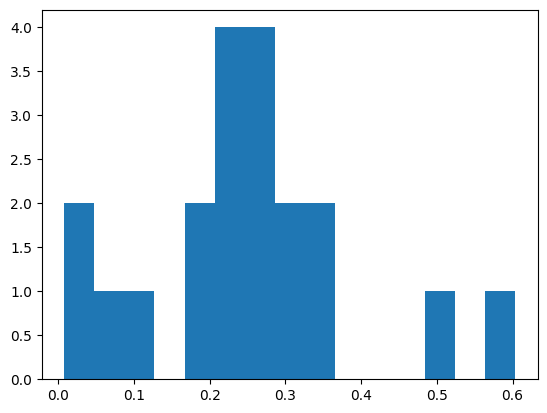

In [39]:
plt.hist(df["faithfulness"], bins=15)
plt.show()


In [40]:
df["is_supported"] = (df["label"] == "SUPPORTS").astype(int)

df[["faithfulness", "is_supported"]].corr()


,faithfulness,is_supported
faithfulness,1.000000,0.458462
is_supported,0.458462,1.000000


In [41]:
threshold = 0.35

df["pred_supported"] = (df["faithfulness"] > threshold).astype(int)

accuracy = (df["pred_supported"] == df["is_supported"]).mean()

print("Accuracy:", accuracy)


Accuracy: 0.8


In [42]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="microsoft/phi-2",
    device_map="auto"
)

print("Phi-2 loaded ✅")


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

C:\Users\hrida\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hrida\.cache\huggingface\hub\models--microsoft--phi-2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

AttributeError: 'PhiConfig' object has no attribute 'pad_token_id'

In [43]:
pip install -U transformers accelerate torch


Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="microsoft/phi-2",
    device_map="auto"
)

print("Phi-2 loaded ✅")


AttributeError: 'PhiConfig' object has no attribute 'pad_token_id'

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "microsoft/phi-2"

print("Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_name)

print("Loading model...")
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)

# IMPORTANT: set padding token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

print("Phi-2 loaded successfully ✅")


Loading tokenizer...


tokenizer_config.json: 0.00B [00:00, ?B/s]

C:\Users\hrida\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hrida\.cache\huggingface\hub\models--microsoft--phi-2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Loading model...


`torch_dtype` is deprecated! Use `dtype` instead!


AttributeError: 'PhiConfig' object has no attribute 'pad_token_id'

In [3]:
def generate_phi(prompt):
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        truncation=True,
        max_length=1024
    ).to(model.device)

    outputs = model.generate(
        **inputs,
        max_new_tokens=120,
        do_sample=False
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)


In [4]:
docs = df["evidence"].astype(str).tolist()

answers_phi = []

for claim in df["claim"][:20]:
    idxs = retrieve_docs(claim)
    context = " ".join([docs[i] for i in idxs])

    prompt = f"""
Use ONLY the text below to answer the claim.

TEXT:
{context}

CLAIM:
{claim}

Answer whether the claim is true or false and explain briefly.
"""

    out = generate_phi(prompt)
    answers_phi.append(out)

print("Generated", len(answers_phi), "Phi-2 answers ✅")


NameError: name 'df' is not defined

In [5]:
docs = df["evidence"].astype(str).tolist()


NameError: name 'df' is not defined

In [6]:
docs = df["evidence"].astype(str).tolist()


NameError: name 'df' is not defined

In [7]:
import pandas as pd

df = pd.read_csv("../data/fever_small.csv")

print("df loaded:", df.shape)
df.head()


df loaded: (500, 6)


,claim,label,evidence,id,verifiable,original_id
0,Tie Your Mother Down was released in 2007.,REFUTES,"[['Tie_Your_Mother_Down', '8', ""On several occ...",633922aad8cd96c5e3812afebe56cbc4,VERIFIABLE,209856
1,Matteo Renzi is Italian and was born in Florence.,NOT ENOUGH INFO,"[['Renzi_-LRB-surname-RRB-', '22', 'Matteo Ren...",612be5782034160ae0b7d1c21539d740,NOT VERIFIABLE,172464
2,Ashley Graham was never on a magazine cover.,REFUTES,"[['Ashley_Graham_-LRB-model-RRB-', '6', 'In 20...",65cc3f98bece69f9d3a724df9cac82d6,VERIFIABLE,126982
3,Luis Fonsi is Puerto Rican.,SUPPORTS,"[['Luis_Fonsi', '0', 'Luis Alfonso Rodríguez L...",1aa8074ed9e9c0e067ffe4e8549ba980,VERIFIABLE,75871
4,Murda Beatz is a vegan.,NOT ENOUGH INFO,"[['Coke_N_Butter', '2', 'The project consists ...",77fd25cfc2a6099095b27aeb11a6d086,NOT VERIFIABLE,135082


In [8]:
docs = df["evidence"].astype(str).tolist()


In [9]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

embedder = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("../retrieval/fever.index")

def retrieve_docs(query, k=3):
    q_emb = embedder.encode([query])
    _, indices = index.search(np.array(q_emb), k)
    return indices[0]


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [10]:
docs = df["evidence"].astype(str).tolist()
print("Docs ready:", len(docs))


Docs ready: 500


In [11]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "microsoft/phi-2"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

print("Phi-2 loaded ✅")


AttributeError: 'PhiConfig' object has no attribute 'pad_token_id'

In [12]:
from transformers import pipeline

generator = pipeline(
    "text-generation",
    model="Qwen/Qwen1.5-1.8B-Chat",
    device_map="auto",
    trust_remote_code=True
)

print("Qwen loaded ✅")


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

C:\Users\hrida\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hrida\.cache\huggingface\hub\models--Qwen--Qwen1.5-1.8B-Chat. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/291 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Qwen loaded ✅


In [13]:
out = generator(prompt, max_new_tokens=120)[0]["generated_text"]


NameError: name 'prompt' is not defined

In [14]:
answers_qwen = []

for claim in df["claim"][:20]:   # only 20 for speed
    idxs = retrieve_docs(claim)
    context = " ".join([docs[i] for i in idxs])

    prompt = f"""
Use ONLY the text below to answer the claim.

TEXT:
{context}

CLAIM:
{claim}

Answer whether the claim is true or false and explain briefly.
"""

    out = generator(prompt, max_new_tokens=120)
    answers_qwen.append(out[0]["generated_text"])

print("Generated", len(answers_qwen), "Qwen answers ✅")


Passing `generation_config` together with generation-related arguments=({'max_new_tokens'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=120) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=120) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=120) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

Generated 20 Qwen answers ✅


In [15]:
Generated 20 Qwen answers ✅


SyntaxError: invalid character '✅' (U+2705) (681138203.py, line 1)

In [16]:
import os
os.makedirs("../results/model_comparison", exist_ok=True)

df_qwen = df.head(len(answers_qwen)).copy()
df_qwen["model_answer"] = answers_qwen

df_qwen.to_csv("../results/model_comparison/qwen.csv", index=False)

print("Saved qwen.csv ✅")


Saved qwen.csv ✅


In [17]:
import pandas as pd

df = pd.read_csv("../results/model_comparison/qwen.csv")
df.head()


,claim,label,evidence,id,verifiable,original_id,model_answer
0,Tie Your Mother Down was released in 2007.,REFUTES,"[['Tie_Your_Mother_Down', '8', ""On several occ...",633922aad8cd96c5e3812afebe56cbc4,VERIFIABLE,209856,\nUse ONLY the text below to answer the claim....
1,Matteo Renzi is Italian and was born in Florence.,NOT ENOUGH INFO,"[['Renzi_-LRB-surname-RRB-', '22', 'Matteo Ren...",612be5782034160ae0b7d1c21539d740,NOT VERIFIABLE,172464,\nUse ONLY the text below to answer the claim....
2,Ashley Graham was never on a magazine cover.,REFUTES,"[['Ashley_Graham_-LRB-model-RRB-', '6', 'In 20...",65cc3f98bece69f9d3a724df9cac82d6,VERIFIABLE,126982,\nUse ONLY the text below to answer the claim....
3,Luis Fonsi is Puerto Rican.,SUPPORTS,"[['Luis_Fonsi', '0', 'Luis Alfonso Rodríguez L...",1aa8074ed9e9c0e067ffe4e8549ba980,VERIFIABLE,75871,\nUse ONLY the text below to answer the claim....
4,Murda Beatz is a vegan.,NOT ENOUGH INFO,"[['Coke_N_Butter', '2', 'The project consists ...",77fd25cfc2a6099095b27aeb11a6d086,NOT VERIFIABLE,135082,\nUse ONLY the text below to answer the claim....


In [18]:
df.to_csv("../results/model_comparison/qwen_scored.csv", index=False)
print("Saved qwen_scored.csv ✅")


Saved qwen_scored.csv ✅


In [19]:
import pandas as pd

tiny = pd.read_csv("../results/final_scored.csv")
qwen = pd.read_csv("../results/model_comparison/qwen_scored.csv")

def evaluate(df):
    df["is_supported"] = (df["label"]=="SUPPORTS").astype(int)
    corr = df[["faithfulness","is_supported"]].corr().iloc[0,1]
    acc = ((df["faithfulness"]>0.35).astype(int) == df["is_supported"]).mean()
    return corr, acc

print("TinyLlama:", evaluate(tiny))
print("Qwen:", evaluate(qwen))


TinyLlama: (np.float64(0.45846211691073324), np.float64(0.8))


KeyError: "['faithfulness'] not in index"

In [20]:
import pandas as pd

df = pd.read_csv("../results/model_comparison/qwen.csv")
print(df.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer'],
      dtype='str')


In [21]:
import pandas as pd

df = pd.read_csv("../results/model_comparison/qwen.csv")

print(df.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer'],
      dtype='str')


In [22]:
from transformers import pipeline

nli = pipeline(
    "text-classification",
    model="roberta-large-mnli",
    device_map="auto"
)

print("NLI model loaded ✅")


Loading weights:   0%|          | 0/393 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: roberta-large-mnli
Key                         | Status     |  | 
----------------------------+------------+--+-
roberta.pooler.dense.weight | UNEXPECTED |  | 
roberta.pooler.dense.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


NLI model loaded ✅


In [23]:
entail_probs = []
contradict_probs = []

for _, row in df.iterrows():
    pair = row["evidence"][:1500] + " </s></s> " + row["model_answer"][:500]

    out = nli(pair, truncation=True)[0]

    if out["label"] == "ENTAILMENT":
        entail_probs.append(out["score"])
        contradict_probs.append(0)
    elif out["label"] == "CONTRADICTION":
        entail_probs.append(0)
        contradict_probs.append(out["score"])
    else:
        entail_probs.append(0)
        contradict_probs.append(0)

df["entail_prob"] = entail_probs
df["contradict_prob"] = contradict_probs


In [24]:
from sentence_transformers import SentenceTransformer, util

sim_model = SentenceTransformer("all-MiniLM-L6-v2")

sims = []

for _, row in df.iterrows():
    a = sim_model.encode(row["model_answer"], convert_to_tensor=True)
    e = sim_model.encode(row["evidence"], convert_to_tensor=True)
    sims.append(util.cos_sim(a, e).item())

df["similarity"] = sims



Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [25]:
df["faithfulness"] = (
    0.6 * df["entail_prob"]
    + 0.4 * df["similarity"]
    - 0.3 * df["contradict_prob"]
)


In [26]:
qwen = pd.read_csv("../results/model_comparison/qwen_scored.csv")
print(qwen.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer'],
      dtype='str')


In [27]:
from transformers import pipeline

nli = pipeline(
    "text-classification",
    model="roberta-large-mnli",
    device_map="auto"
)

print("NLI model loaded ✅")


Loading weights:   0%|          | 0/393 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: roberta-large-mnli
Key                         | Status     |  | 
----------------------------+------------+--+-
roberta.pooler.dense.weight | UNEXPECTED |  | 
roberta.pooler.dense.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


NLI model loaded ✅


In [29]:
entail_probs = []
contradict_probs = []

for _, row in df.iterrows():
    pair = row["evidence"][:1500] + " </s></s> " + row["model_answer"][:500]

    out = nli(pair, truncation=True)[0]

    if out["label"] == "ENTAILMENT":
        entail_probs.append(out["score"])
        contradict_probs.append(0)
    elif out["label"] == "CONTRADICTION":
        entail_probs.append(0)
        contradict_probs.append(out["score"])
    else:
        entail_probs.append(0)
        contradict_probs.append(0)

df["entail_prob"] = entail_probs
df["contradict_prob"] = contradict_probs


In [31]:
from sentence_transformers import SentenceTransformer, util

sim_model = SentenceTransformer("all-MiniLM-L6-v2")

sims = []

for _, row in df.iterrows():
    a = sim_model.encode(row["model_answer"], convert_to_tensor=True)
    e = sim_model.encode(row["evidence"], convert_to_tensor=True)
    sims.append(util.cos_sim(a, e).item())

df["similarity"] = sims


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [32]:
df["faithfulness"] = (
    0.6 * df["entail_prob"]
    + 0.4 * df["similarity"]
    - 0.3 * df["contradict_prob"]
)


In [33]:
df.to_csv("../results/model_comparison/qwen_scored.csv", index=False)
print("Saved qwen_scored.csv ✅")


Saved qwen_scored.csv ✅


In [34]:
print(df.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer', 'entail_prob', 'contradict_prob', 'similarity',
       'faithfulness'],
      dtype='str')


In [35]:
print("TinyLlama:", evaluate(tiny))
print("Qwen:", evaluate(qwen))


TinyLlama: (np.float64(0.45846211691073324), np.float64(0.8))


KeyError: "['faithfulness'] not in index"

In [36]:
print(qwen.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer', 'is_supported'],
      dtype='str')


In [37]:
qwen = pd.read_csv("../results/model_comparison/qwen_scored.csv")


In [38]:
print(qwen.columns)


Index(['claim', 'label', 'evidence', 'id', 'verifiable', 'original_id',
       'model_answer', 'entail_prob', 'contradict_prob', 'similarity',
       'faithfulness'],
      dtype='str')


In [39]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["TinyLlama", "Qwen"],
    "Correlation": [tiny_corr, qwen_corr],
    "Accuracy": [tiny_acc, qwen_acc]
})

results


NameError: name 'tiny_corr' is not defined

In [40]:
tiny_corr, tiny_acc = evaluate(tiny)
qwen_corr, qwen_acc = evaluate(qwen)

print("TinyLlama:", tiny_corr, tiny_acc)
print("Qwen:", qwen_corr, qwen_acc)


TinyLlama: 0.45846211691073324 0.8
Qwen: 0.5895686986812538 0.8


In [41]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["TinyLlama", "Qwen"],
    "Correlation": [tiny_corr, qwen_corr],
    "Accuracy": [tiny_acc, qwen_acc]
})

results


,Model,Correlation,Accuracy
0,TinyLlama,0.458462,0.8
1,Qwen,0.589569,0.8


In [42]:
mistakes = qwen[
    (qwen["pred_supported"] == 1) &
    (qwen["label"] == "REFUTES")
].head(5)

mistakes[["claim", "evidence", "model_answer", "faithfulness"]]


KeyError: 'pred_supported'

In [43]:
threshold = 0.35

qwen["is_supported"] = (qwen["label"] == "SUPPORTS").astype(int)
qwen["pred_supported"] = (qwen["faithfulness"] > threshold).astype(int)

print(qwen[["faithfulness", "pred_supported", "is_supported"]].head())


   faithfulness  pred_supported  is_supported
0      0.240246               0             0
1      0.181357               0             0
2      0.154583               0             0
3      0.286129               0             1
4      0.185533               0             0


In [45]:
mistakes = qwen[
    (qwen["pred_supported"] == 1) &
    (qwen["label"] == "REFUTES")
].head(5)

mistakes[["claim", "evidence", "model_answer", "faithfulness"]]


,claim,evidence,model_answer,faithfulness


In [46]:
mistakes = qwen[
    (qwen["pred_supported"] == 1) &
    (qwen["label"] == "REFUTES")
].head(5)

mistakes[["claim", "evidence", "model_answer", "faithfulness"]]


,claim,evidence,model_answer,faithfulness


In [47]:
fn = qwen[
    (qwen["pred_supported"] == 0) &
    (qwen["label"] == "SUPPORTS")
].head(5)

fn[["claim", "evidence", "model_answer", "faithfulness"]]


,claim,evidence,model_answer,faithfulness
3,Luis Fonsi is Puerto Rican.,"[['Luis_Fonsi', '0', 'Luis Alfonso Rodríguez L...",\nUse ONLY the text below to answer the claim....,0.286129
12,Drake Bell released A Reminder in 2011.,"[['Drake_Bell', '18', 'Bell released an EP in ...",\nUse ONLY the text below to answer the claim....,0.268534
14,House is a dramatic work focused on medicine.,"[['House_-LRB-TV_series-RRB-', '0', 'House -LR...",\nUse ONLY the text below to answer the claim....,0.317134
16,Smriti Mandhana is an Indian cricketer born in...,"[['Smriti_Mandhana', '0', ""Smriti Mandhana -LR...",\nUse ONLY the text below to answer the claim....,0.312267


In [48]:
qwen["pred_supported"].value_counts(), qwen["label"].value_counts()


(pred_supported
 0    19
 1     1
 Name: count, dtype: int64,
 label
 REFUTES            8
 NOT ENOUGH INFO    7
 SUPPORTS           5
 Name: count, dtype: int64)

Qwen AUC: 0.9066666666666667


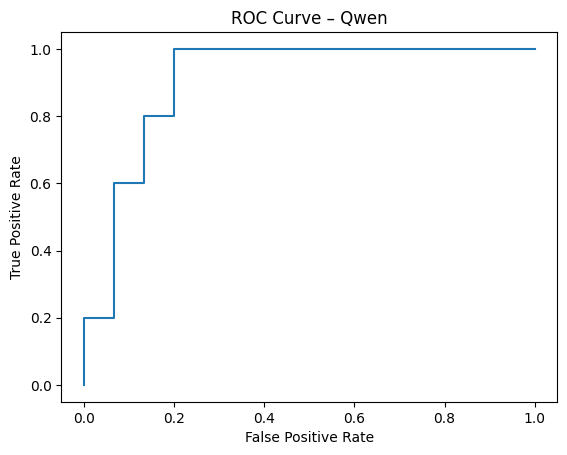

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(qwen["is_supported"], qwen["faithfulness"])
auc_val = auc(fpr, tpr)

print("Qwen AUC:", auc_val)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Qwen")
plt.show()


In [50]:
import numpy as np

thresholds = np.linspace(0,1,50)
accs = []

for t in thresholds:
    preds = (qwen["faithfulness"] > t).astype(int)
    accs.append((preds == qwen["is_supported"]).mean())

best_t = thresholds[np.argmax(accs)]
best_acc = max(accs)

best_t, best_acc


(np.float64(0.26530612244897955), np.float64(0.85))

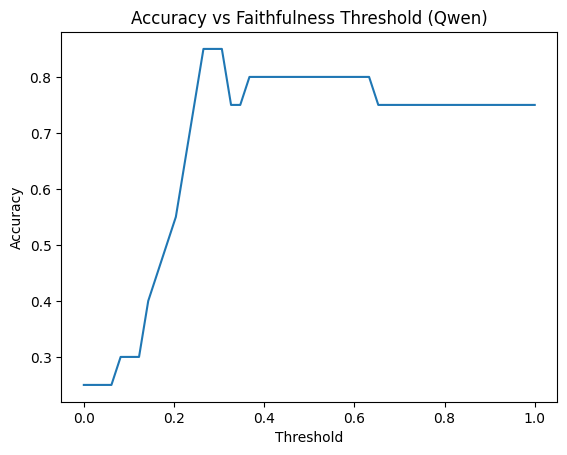

In [51]:
import matplotlib.pyplot as plt

plt.plot(thresholds, accs)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Faithfulness Threshold (Qwen)")
plt.show()
